This dataset represents customer credit risk information collected by a financial company to predict whether a customer will default on a loan or not.

Dataset helps banks identify risky customers before giving loans.

# Part-A  Setup & Library Import 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Preprocessing
from scipy import stats
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import (
    LabelEncoder, OrdinalEncoder,
    StandardScaler, PowerTransformer
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings("ignore")

# Part B — Data Acquisition

Load Dataset CSV

In [6]:
df = pd.read_csv("customer_credit.csv")

Load Data from Jason

In [7]:
import requests

url_json = "https://jsonplaceholder.typicode.com/users"

response = requests.get(url_json)
data = response.json()

df_json = pd.DataFrame(data)
df_json.head()


,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


 Load Data from mySQL Database

In [57]:
# Database connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="498910",
    database="customer_credit_db"
)
sql_query = "SELECT * FROM customers"
sql_df = pd.read_sql(sql_query, conn)

print("Data loaded successfully from mySQL database.")
sql_df.head()
# conn.close()


Data loaded successfully from mySQL database.


,customer_id,first_name,last_name,email,phone,credit_limit,current_balance,credit_score,created_at
0,1,Rahul,Sharma,rahul1@gmail.com,9876543210,100000.0,25000.0,750,2026-02-15 00:13:00
1,2,Priya,Verma,priya1@gmail.com,9123456780,50000.0,10000.0,720,2026-02-15 00:13:00
2,3,Amit,Singh,amit1@gmail.com,9988776655,200000.0,50000.0,800,2026-02-15 00:13:00
3,4,Neha,Gupta,neha1@gmail.com,9012345678,75000.0,20000.0,710,2026-02-15 00:13:00
4,5,Rohit,Kumar,rohit1@gmail.com,9090909090,150000.0,60000.0,780,2026-02-15 00:13:00


Load Data from API

In [8]:
url_api = "https://api.sampleapis.com/fakebank/accounts"

response = requests.get(url_api)
api_data = response.json()

df_api = pd.DataFrame(api_data)
df_api.head()

,transactionDate,description,category,debit,credit,id
0,2016-01-02,Dr. FlimFlam's miracle cream,Health Care,59.999,None,2
1,2016-01-05,Planet Express,Other Services,14.95,None,3
2,2016-01-08,MomCorp,Payment/Credit,None,175.78,4
3,2016-01-10,30th Century Fox,Merchandise,20.98,None,5
4,2016-01-10,Human Broth,Merchandise,68.85,None,6


# Part C — Data Understanding & Cleaning

In [9]:
df.head()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,1,23.0,NaN,East,Secondary,Unemployed,210064.0,910751.0,Education,380.0,8,178,15.88,2018-03-31,1
1,2,49.0,Other,North,Secondary,Salaried,1196004.0,108369.0,Car,540.0,3,103,45.48,2020-06-24,0
2,3,55.0,Female,West,Primary,Unemployed,NaN,1139110.0,Other,576.0,12,184,50.95,2023-09-07,0
3,4,59.0,Female,West,Secondary,Unemployed,1189361.0,340698.0,Home,691.0,4,197,16.91,2020-03-26,0
4,5,38.0,Other,North,Primary,Unemployed,1191859.0,296844.0,Education,NaN,7,108,31.63,2018-08-15,0


In [10]:
df.tail()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
995,996,NaN,Female,West,Post-Graduate,Self-Employed,530933.0,670828.0,Other,805.0,1,37,87.68,2016-08-08,0
996,997,30.0,Female,East,Primary,Self-Employed,1128076.0,615197.0,Education,596.0,3,112,81.03,2019-03-18,0
997,998,21.0,Male,North,Primary,Self-Employed,1486663.0,778337.0,Education,667.0,0,19,31.75,2019-06-27,1
998,999,30.0,Other,West,Post-Graduate,Salaried,334951.0,287481.0,Other,441.0,6,90,35.77,2021-12-30,0
999,1000,45.0,Female,West,Graduate,Self-Employed,621932.0,857642.0,Other,655.0,4,95,36.58,2018-07-05,0


In [11]:
df.columns

Index(['customer_id', 'age', 'gender', 'region', 'education_level',
       'employment_type', 'annual_income', 'loan_amount', 'loan_purpose',
       'credit_score', 'repayment_history', 'transaction_count',
       'spending_ratio', 'join_date', 'default_flag'],
      dtype='object')

In [12]:
df.shape

(1000, 15)

Dataset Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   int64  
 1   age                927 non-null    float64
 2   gender             879 non-null    object 
 3   region             1000 non-null   object 
 4   education_level    1000 non-null   object 
 5   employment_type    942 non-null    object 
 6   annual_income      854 non-null    float64
 7   loan_amount        963 non-null    float64
 8   loan_purpose       1000 non-null   object 
 9   credit_score       908 non-null    float64
 10  repayment_history  1000 non-null   int64  
 11  transaction_count  1000 non-null   int64  
 12  spending_ratio     1000 non-null   float64
 13  join_date          1000 non-null   object 
 14  default_flag       1000 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 117.3+ KB


In [14]:
df.describe()

,customer_id,age,annual_income,loan_amount,credit_score,repayment_history,transaction_count,spending_ratio,default_flag
count,1000.000000,927.000000,8.540000e+02,9.630000e+02,908.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,42.987055,1.063508e+06,7.639890e+05,566.174009,6.21900,104.422000,49.702600,0.312000
std,288.819436,12.558281,5.137070e+05,4.295219e+05,164.047343,3.81308,55.892378,23.512497,0.463542
min,1.000000,21.000000,2.031510e+05,5.156100e+04,300.000000,0.00000,5.000000,10.040000,0.000000
25%,250.750000,33.000000,6.262000e+05,3.799345e+05,422.750000,3.00000,56.000000,28.507500,0.000000
50%,500.500000,43.000000,1.035614e+06,7.644910e+05,555.500000,6.00000,105.000000,49.640000,0.000000
75%,750.250000,54.000000,1.504018e+06,1.138846e+06,716.250000,10.00000,153.250000,69.960000,1.000000
max,1000.000000,64.000000,1.997078e+06,1.499367e+06,850.000000,12.00000,199.000000,89.950000,1.000000


Missing Values Check

In [15]:
df.isnull().sum()

customer_id            0
age                   73
gender               121
region                 0
education_level        0
employment_type       58
annual_income        146
loan_amount           37
loan_purpose           0
credit_score          92
repayment_history      0
transaction_count      0
spending_ratio         0
join_date              0
default_flag           0
dtype: int64

In [16]:
df.isnull().mean()*100

customer_id           0.0
age                   7.3
gender               12.1
region                0.0
education_level       0.0
employment_type       5.8
annual_income        14.6
loan_amount           3.7
loan_purpose          0.0
credit_score          9.2
repayment_history     0.0
transaction_count     0.0
spending_ratio        0.0
join_date             0.0
default_flag          0.0
dtype: float64

Missing Values Visualization

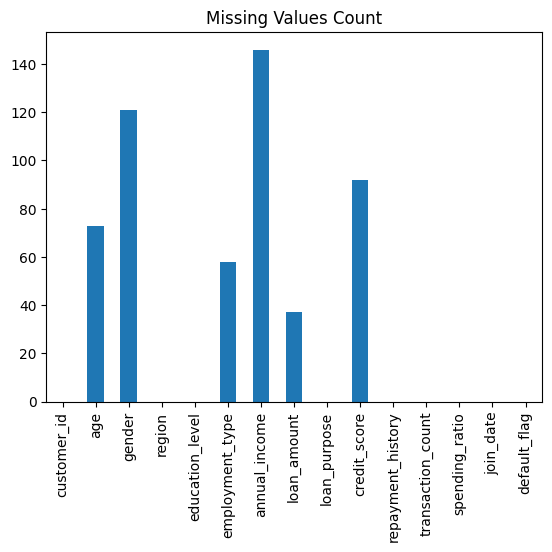

In [17]:
df.isnull().sum().plot(kind='bar')
plt.title("Missing Values Count")
plt.show()

1.Simple Imputer (Numerical: Mean/Median)

Fill Annual_income column 

In [18]:
mean_imp = SimpleImputer(strategy="mean")
df[["annual_income"]] = mean_imp.fit_transform(df[["annual_income"]])

In [19]:
df[["annual_income"]]

,annual_income
0,2.100640e+05
1,1.196004e+06
2,1.063508e+06
3,1.189361e+06
4,1.191859e+06
...,...
995,5.309330e+05
996,1.128076e+06
997,1.486663e+06
998,3.349510e+05


Fill Loan_amoumt column

In [20]:
median_imp = SimpleImputer(strategy="median")
df[["loan_amount"]] = median_imp.fit_transform(df[["loan_amount"]])

In [21]:
df[["loan_amount"]]

,loan_amount
0,910751.0
1,108369.0
2,1139110.0
3,340698.0
4,296844.0
...,...
995,670828.0
996,615197.0
997,778337.0
998,287481.0


2. Simple Imputer (Categorical: Most Frequent)

In [22]:
cat_imp = SimpleImputer(strategy="most_frequent")

df[["employment_type"]] = cat_imp.fit_transform(df[["employment_type"]])

In [23]:
df[["employment_type"]]

,employment_type
0,Unemployed
1,Salaried
2,Unemployed
3,Unemployed
4,Unemployed
...,...
995,Self-Employed
996,Self-Employed
997,Self-Employed
998,Salaried


3. Most Frequent Category Imputation (Manual)

In [24]:
mode_val = df["gender"].mode()[0]

df["gender"].fillna(mode_val, inplace=True)

In [25]:
df["gender"]

0       Other
1       Other
2      Female
3      Female
4       Other
        ...  
995    Female
996    Female
997      Male
998     Other
999    Female
Name: gender, Length: 1000, dtype: object

4. Missing Indicator + Random Sample Imputation

In [26]:
df["age_missing"] = df["age"].isnull().astype(int)

In [27]:
random_sample = df["age"].dropna().sample(
    df["age"].isnull().sum(),
    random_state=42
)

random_sample.index = df[df["age"].isnull()].index

df.loc[df["age"].isnull(), "age"] = random_sample

5. KNN Imputer (Multivariate)

In [28]:
knn_imp = KNNImputer(n_neighbors=5)
cols = ["age","annual_income","credit_score"]
df[cols] = knn_imp.fit_transform(df[cols])

6. MICE Algorithm

In [29]:
# select numerical columns
num_cols = df.select_dtypes(include="number")
mice_imp = IterativeImputer(random_state=0)
df[num_cols.columns] = mice_imp.fit_transform(num_cols)

7. Complete Case Analysis (Dropping Rows/Columns)

In [30]:
df_clean = df.dropna()

In [31]:
df.isnull()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag,age_missing
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Part D — Outlier Handling

Check outliers using boxplot.

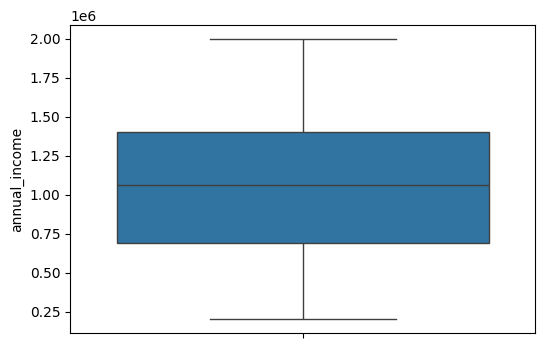

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(df["annual_income"])
plt.show()

The annual income distribution shows a wide spread with a high upper range, indicating variability among customers.

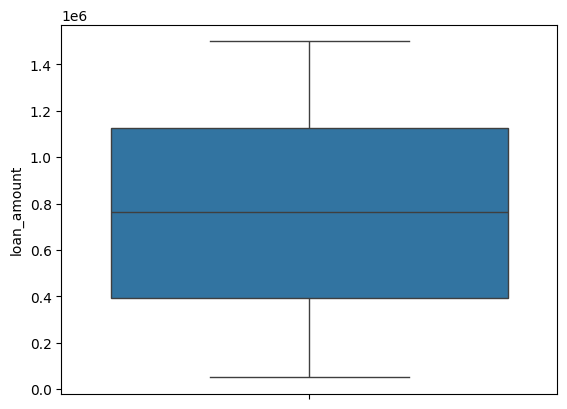

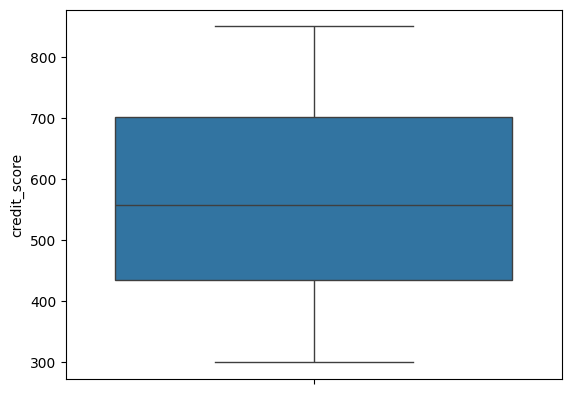

In [33]:
sns.boxplot(df["loan_amount"])
plt.show()

sns.boxplot(df["credit_score"])
plt.show()

Loan Amount: The loan amount shows a wide range with moderate variability, but no extreme outliers are clearly visible. Most loans are concentrated around the median range.

Credit Score: Credit scores are fairly evenly distributed with a moderate spread, and there are no significant extreme outliers, indicating stable credit behavior among customers.

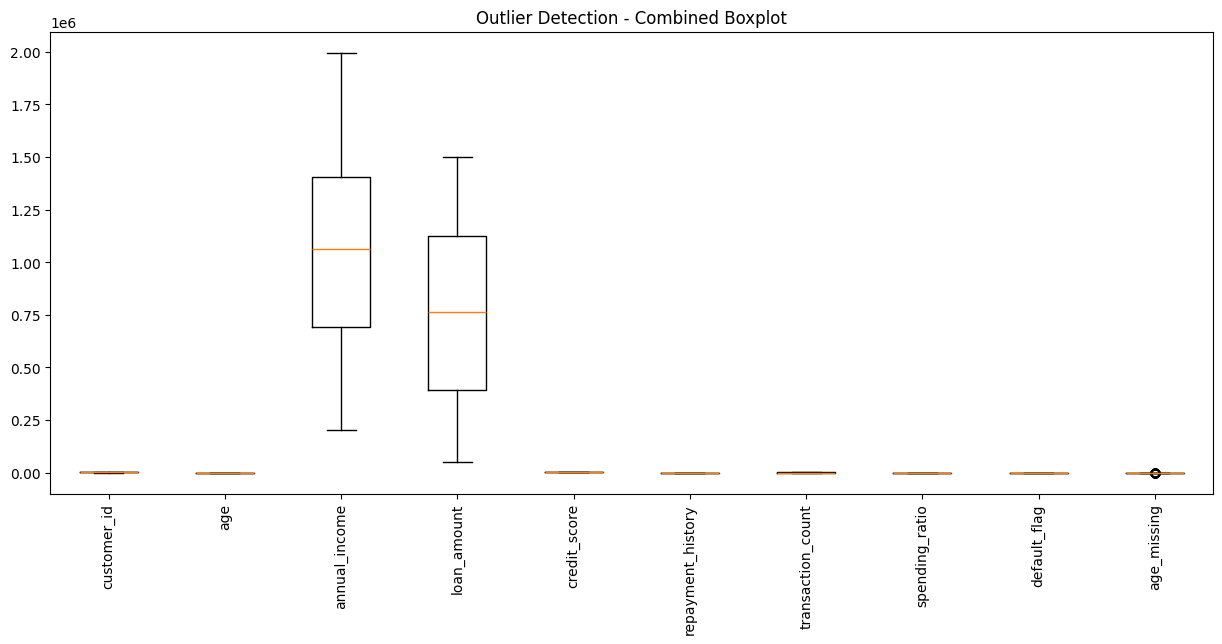

In [34]:
plt.figure(figsize=(15,6))
plt.boxplot(num_cols.values, labels=num_cols.columns)
plt.xticks(rotation=90)
plt.title("Outlier Detection - Combined Boxplot")
plt.show()

Annual income and loan amount show significant outliers with a wide spread compared to other variables.

Most remaining features are tightly distributed, indicating minimal extreme values in those columns.

Outlier Detaction using z-score

In [35]:
col = "loan_amount"
z_scores = stats.zscore(df[col].dropna())
df_z = df.loc[df[col].dropna().index][np.abs(z_scores) < 3]

Outlier Detection using IQR

In [36]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

df_iqr = df[(df[col] >= lower_iqr) & (df[col] <= upper_iqr)]

Outlier Detection using Percentile

In [37]:
lower_p = df[col].quantile(0.01)
upper_p = df[col].quantile(0.99)

df_percentile = df[(df[col] >= lower_p) & (df[col] <= upper_p)]

In [38]:
from scipy.stats.mstats import winsorize

df["loan_amount_winsorized"] = winsorize(df[col], limits=[0.01, 0.01])

print("Original rows:", len(df))
print("After Z-score:", len(df_z))
print("After IQR:", len(df_iqr))
print("After Percentile:", len(df_percentile))
print("Winsorization applied successfully.")

Original rows: 1000
After Z-score: 1000
After IQR: 1000
After Percentile: 980
Winsorization applied successfully.


# Part E — Feature Engineering

# Handle Variable Types

Date Handling

In [39]:
df["join_date"] = pd.to_datetime(df["join_date"])

df["join_year"] = df["join_date"].dt.year
df["join_month"] = df["join_date"].dt.month
df["join_weekday"] = df["join_date"].dt.weekday

df.drop("join_date", axis=1, inplace=True)

Mixed Variables (numeric + categorical)

In [40]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numeric Columns: Index(['customer_id', 'age', 'annual_income', 'loan_amount', 'credit_score',
       'repayment_history', 'transaction_count', 'spending_ratio',
       'default_flag', 'age_missing', 'loan_amount_winsorized', 'join_year',
       'join_month', 'join_weekday'],
      dtype='object')
Categorical Columns: Index(['gender', 'region', 'education_level', 'employment_type',
       'loan_purpose'],
      dtype='object')


# Encoding Categorical Variables

Label Encoding (Gender)

In [41]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])

Ordinal Encoding (education level)

In [42]:
education_order = [["Primary","Secondary","Graduate","Post-Graduate"]]

ord_enc = OrdinalEncoder(categories=education_order)
df["education_level"] = ord_enc.fit_transform(df[["education_level"]])

One-Hot Encoding

In [43]:
df = pd.get_dummies(
    df,
    columns=["region", "loan_purpose"],
    drop_first=True
)

# Encoding Numerical Features

Binning

In [44]:
df["income_group"] = pd.cut(
    df["annual_income"],
    bins=4,
    labels=["Low", "Medium", "High", "Very High"]
)

Binarization

In [45]:
df["income_flag"] = (df["annual_income"] > 50000).astype(int)

Quantile Binning

In [46]:
df["income_quantile"] = pd.qcut(df["annual_income"], q=4)

K-Means Binning

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
df["income_cluster"] = kmeans.fit_predict(df[["annual_income"]])

# Part H — Feature Scaling

(a) Standardization (Z-score)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["income_standard"] = scaler.fit_transform(df[["annual_income"]])

In [53]:
df["income_standard"]

0     -1.798808
1      0.279263
2      0.000000
3      0.265261
4      0.270527
         ...   
995   -1.122511
996    0.136091
997    0.891887
998   -1.535583
999   -0.930712
Name: income_standard, Length: 1000, dtype: float64

(b) Normalization

In [49]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
df["income_normalized"] = norm.fit_transform(df[["annual_income"]])

In [54]:
df["income_normalized"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: income_normalized, Length: 1000, dtype: float64

(c) Min-Max Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df["income_minmax"] = minmax.fit_transform(df[["annual_income"]])

In [55]:
df["income_minmax"]

0      0.003854
1      0.553452
2      0.479594
3      0.549749
4      0.551142
         ...   
995    0.182718
996    0.515587
997    0.715476
998    0.073470
999    0.233444
Name: income_minmax, Length: 1000, dtype: float64

(d) MaxAbs Scaling

In [51]:
from sklearn.preprocessing import MaxAbsScaler

maxabs = MaxAbsScaler()
df["income_maxabs"] = maxabs.fit_transform(df[["annual_income"]])

In [56]:
df["income_maxabs"]

0      0.105186
1      0.598877
2      0.532532
3      0.595551
4      0.596801
         ...   
995    0.265855
996    0.564863
997    0.744419
998    0.167721
999    0.311421
Name: income_maxabs, Length: 1000, dtype: float64

(e) Robust Scaling

In [52]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
df["income_robust"] = robust.fit_transform(df[["annual_income"]])

In [57]:
df["income_robust"]

0     -1.198479
1      0.186063
2      0.000000
3      0.176734
4      0.180242
         ...   
995   -0.747888
996    0.090672
997    0.594231
998   -1.023102
999   -0.620099
Name: income_robust, Length: 1000, dtype: float64

# Part G: Feature Construction & Transformation

# FunctionTransformer (log, sqrt, reciprocal)

In [59]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

Log Transform

In [60]:
log_transform = FunctionTransformer(np.log1p)
df["income_log"] = log_transform.fit_transform(df[["annual_income"]])

Square Root

In [61]:
sqrt_transform = FunctionTransformer(np.sqrt)
df["income_sqrt"] = sqrt_transform.fit_transform(df[["annual_income"]])

In [64]:
df["income_sqrt"]

0       458.327394
1      1093.619678
2      1031.265154
3      1090.578287
4      1091.722950
          ...     
995     728.651494
996    1062.109222
997    1219.287907
998     578.749514
999     788.626654
Name: income_sqrt, Length: 1000, dtype: float64

Reciprocal

In [62]:
reciprocal = FunctionTransformer(lambda x: 1/(x+1))
df["income_reciprocal"] = reciprocal.fit_transform(df[["annual_income"]])

In [63]:
df["income_reciprocal"]

0      4.760431e-06
1      8.361169e-07
2      9.402837e-07
3      8.407869e-07
4      8.390247e-07
           ...     
995    1.883473e-06
996    8.864643e-07
997    6.726469e-07
998    2.985502e-06
999    1.607890e-06
Name: income_reciprocal, Length: 1000, dtype: float64

# (b) PowerTransformer

In [65]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df["income_power"] = pt.fit_transform(df[["annual_income"]])

# (c) ColumnTransformer

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = ColumnTransformer([
    ("scale_income", StandardScaler(), ["annual_income"]),
    ("encode_gender", OneHotEncoder(), ["gender"])
], remainder="passthrough")

df_transformed = ct.fit_transform(df)

# Feature Construction

Debt-to-Income Ratio

In [67]:
df["debt_income_ratio"] = df["loan_amount"] / df["annual_income"]

Average Monthly Income

In [68]:
df["monthly_income"] = df["annual_income"] / 12

Spending-to-Income Ratio

In [69]:
df["spending_income_ratio"] = df["loan_amount"] / df["annual_income"]

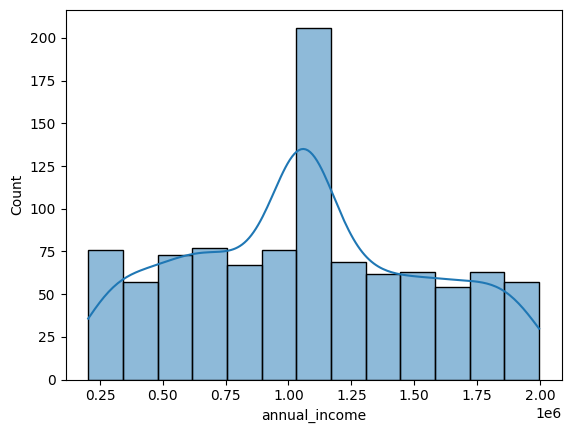

In [70]:
sns.histplot(df["annual_income"], kde=True)
plt.show()

The annual income distribution is roughly centered around 1 million, with a fairly symmetric spread and moderate variability across the range

In [71]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson")

cols_transform = ["annual_income", "loan_amount"]

df[cols_transform] = pt.fit_transform(df[cols_transform])

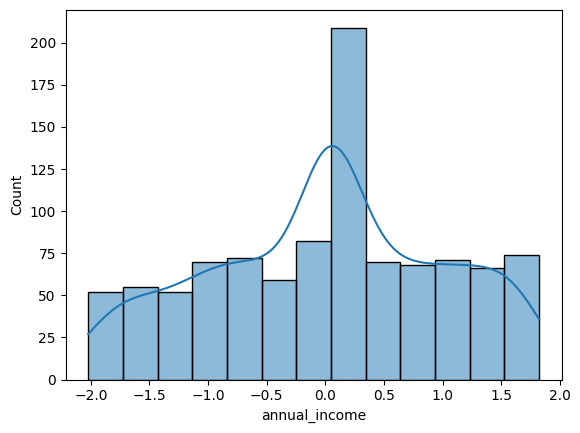

In [72]:
sns.histplot(df["annual_income"], kde=True)
plt.show()

The distribution of annual income appears approximately normal and centered around zero (after scaling), with a fairly symmetric spread and no extreme skewness

In [73]:
df.columns

Index(['customer_id', 'age', 'gender', 'education_level', 'employment_type',
       'annual_income', 'loan_amount', 'credit_score', 'repayment_history',
       'transaction_count', 'spending_ratio', 'default_flag', 'age_missing',
       'loan_amount_winsorized', 'join_year', 'join_month', 'join_weekday',
       'region_North', 'region_South', 'region_West', 'loan_purpose_Car',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Other',
       'income_group', 'income_flag', 'income_quantile', 'income_cluster',
       'income_standard', 'income_normalized', 'income_minmax',
       'income_maxabs', 'income_robust', 'income_log', 'income_sqrt',
       'income_reciprocal', 'income_power', 'debt_income_ratio',
       'monthly_income', 'spending_income_ratio'],
      dtype='object')